In [ ]:
import pandas as pd
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
%tensorflow_version 1.x
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,TimeDistributed,Bidirectional
from keras.layers import LSTM,GRU,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D,Reshape,AveragePooling1D
from keras.layers import GlobalAveragePooling1D
from keras.optimizers import SGD,Adam
%matplotlib inline

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [ ]:
link='https://drive.google.com/open?id=1Hf7XyjZzwm3RyvJUR2lDhNn6AEQw-pxs'
fluff, id = link.split('=')
print (id) 

1Hf7XyjZzwm3RyvJUR2lDhNn6AEQw-pxs


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('we.csv')  
dataset = pd.read_csv('we.csv')

In [ ]:
print("Dataset shape is ", dataset.shape)

Dataset shape is  (175913, 25)


In [ ]:
dataset[:10]

dt         dt_iso  ...  weather_description weather_icon
0  946684800  1/1/2000 0:00  ...         sky is clear          01n
1  946688400  1/1/2000 1:00  ...         sky is clear          01n
2  946692000  1/1/2000 2:00  ...         sky is clear          01n
3  946695600  1/1/2000 3:00  ...         sky is clear          01n
4  946699200  1/1/2000 4:00  ...         sky is clear          01d
5  946702800  1/1/2000 5:00  ...         sky is clear          01d
6  946706400  1/1/2000 6:00  ...         sky is clear          01d
7  946710000  1/1/2000 7:00  ...                 haze          50d
8  946713600  1/1/2000 8:00  ...                 haze          50d
9  946717200  1/1/2000 9:00  ...                 haze          50d

[10 rows x 25 columns]

In [ ]:
#print data set data types

print("Dataset data types")
print("            ", "\n")
print(dataset.dtypes, "\n")

Dataset data types
             

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure               float64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object 



In [ ]:
#the categories of weather_main column
dataset['weather_main'].unique()

array(['Clear', 'Haze', 'Clouds', 'Rain', 'Mist', 'Snow', 'Thunderstorm',
       'Dust', 'Drizzle', 'Fog', 'Tornado', 'Smoke', 'Squall', 'Sand'],
      dtype=object)

In [ ]:
#the categories of weather_description column
dataset['weather_description'].unique()


array(['sky is clear', 'haze', 'broken clouds', 'overcast clouds',
       'light intensity shower rain', 'moderate rain', 'mist',
       'few clouds', 'light rain', 'scattered clouds', 'light snow',
       'snow', 'light shower snow', 'thunderstorm',
       'thunderstorm with rain', 'dust', 'heavy intensity rain',
       'proximity thunderstorm', 'shower rain', 'drizzle', 'fog',
       'light intensity drizzle', 'proximity tornado', 'very heavy rain',
       'heavy intesity shower rain', 'smoke', 'shower sleet',
       'heavy snow', 'thunderstorm with heavy rain', 'shower snow',
       'freezing rain', 'proximity Sand/Dust Whirls', 'proximity squalls',
       'sand', 'rain and drizzle', ' light shower sleet',
       'thunderstorm with light rain', 'light thunderstorm',
       'light rain and snow', 'proximity shower rain',
       'proximity moderate rain', 'heavy thunderstorm'], dtype=object)

In [ ]:
#print the mean of thunderstorm state according to weather_main column
dataset['weather_main'].str.contains("Thunderstorm").mean()

0.004502225531939083

In [ ]:
#print the number of any category in weather according to weather_main column
es = dataset.groupby("weather_main")["temp"].count()
es

weather_main
Clear           73761
Clouds          79815
Drizzle            73
Dust              926
Fog               241
Haze            10896
Mist             3284
Rain             5382
Sand               23
Smoke              22
Snow              691
Squall              6
Thunderstorm      792
Tornado             1
Name: temp, dtype: int64

In [ ]:
#convert the type of WEATHER_MAIN from object to category

dataset["weather_main"] = dataset["weather_main"].astype('category')
dataset.dtypes

dt                        int64
dt_iso                   object
timezone                  int64
city_name                object
lat                     float64
lon                     float64
temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                float64
sea_level               float64
grnd_level              float64
humidity                  int64
wind_speed              float64
wind_deg                  int64
rain_1h                 float64
rain_3h                 float64
snow_1h                 float64
snow_3h                 float64
clouds_all                int64
weather_id                int64
weather_main           category
weather_description      object
weather_icon             object
dtype: object

In [ ]:
#code the WEATHER_MAIN to numbers represent the categories.
#add new column which is coded data named WEATHER_MAIN_CAT instead of WEATHER_MAIN and we will delet it later

dataset["weather_main_cat"] = dataset["weather_main"].cat.codes
dataset.head()

dt         dt_iso  ...  weather_icon weather_main_cat
0  946684800  1/1/2000 0:00  ...           01n                0
1  946688400  1/1/2000 1:00  ...           01n                0
2  946692000  1/1/2000 2:00  ...           01n                0
3  946695600  1/1/2000 3:00  ...           01n                0
4  946699200  1/1/2000 4:00  ...           01d                0

[5 rows x 26 columns]

In [ ]:
#do same act with WEATHER_DESCRPTION 
dataset["weather_description"] = dataset["weather_description"].astype('category')
dataset["weather_description_cat"] = dataset["weather_description"].cat.codes
dataset.head()

dt         dt_iso  ...  weather_main_cat weather_description_cat
0  946684800  1/1/2000 0:00  ...                 0                      34
1  946688400  1/1/2000 1:00  ...                 0                      34
2  946692000  1/1/2000 2:00  ...                 0                      34
3  946695600  1/1/2000 3:00  ...                 0                      34
4  946699200  1/1/2000 4:00  ...                 0                      34

[5 rows x 27 columns]

In [ ]:
#new datashape is this becuse we add 2 new columns
dataset.shape

(175913, 27)

In [ ]:
#Now we will delet the unwanted columns
#we deleted 11 columns
dataset = dataset.drop(columns="dt")
dataset = dataset.drop(columns="timezone")
dataset = dataset.drop(columns="lon")
dataset = dataset.drop(columns="sea_level")
dataset = dataset.drop(columns="grnd_level")
dataset = dataset.drop(columns="snow_3h")
dataset = dataset.drop(columns="snow_1h")
dataset = dataset.drop(columns="weather_icon")
dataset = dataset.drop(columns="weather_main")
dataset = dataset.drop(columns="weather_description")
dataset = dataset.drop(columns="lat")


In [ ]:
#new shape is 16
#27-11=16
dataset.shape

(175913, 16)

In [ ]:
#check columns and data types again
dataset.dtypes

dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                   float64
humidity                     int64
wind_speed                 float64
wind_deg                     int64
rain_1h                    float64
rain_3h                    float64
clouds_all                   int64
weather_id                   int64
weather_main_cat              int8
weather_description_cat       int8
dtype: object

In [ ]:
#fill the missing value with ZERO
dataset.fillna(0)

dt_iso  ... weather_description_cat
0        1/1/2000 0:00  ...                      34
1        1/1/2000 1:00  ...                      34
2        1/1/2000 2:00  ...                      34
3        1/1/2000 3:00  ...                      34
4        1/1/2000 4:00  ...                      34
...                ...  ...                     ...
175908  1/1/2020 19:00  ...                       1
175909  1/1/2020 20:00  ...                       1
175910  1/1/2020 21:00  ...                       1
175911  1/1/2020 22:00  ...                       1
175912  1/1/2020 23:00  ...                      30

[175913 rows x 16 columns]

In [ ]:
# compute statistics such as count , mean,std,min,max
dataset.describe()


temp     feels_like  ...  weather_main_cat  weather_description_cat
count  175913.000000  175913.000000  ...     175913.000000            175913.000000
mean       17.976527      13.424976  ...          1.207620                21.113511
std        10.710774      11.148267  ...          1.962334                13.985232
min       -14.700000     -21.470000  ...          0.000000                 0.000000
25%         9.000000       4.330000  ...          0.000000                 4.000000
50%        18.080000      13.690000  ...          1.000000                30.000000
75%        26.820000      22.650000  ...          1.000000                34.000000
max        42.700000      41.330000  ...         13.000000                41.000000

[8 rows x 14 columns]

In [ ]:
#print maximum values of features
dataset.max()

dt_iso                       9/9/2019 9:00
city_name                  Tehran Province
temp                                  42.7
feels_like                           41.33
temp_min                              42.2
temp_max                                44
pressure                            1038.7
humidity                               100
wind_speed                           45.27
wind_deg                               360
rain_1h                               2.41
rain_3h                              100.1
clouds_all                             100
weather_id                             804
weather_main_cat                        13
weather_description_cat                 41
dtype: object

In [ ]:
#print minimum values of features
dataset.min()

dt_iso                       1/1/2000 0:00
city_name                  Tehran Province
temp                                 -14.7
feels_like                          -21.47
temp_min                               -20
temp_max                               -12
pressure                             984.9
humidity                                 2
wind_speed                            0.01
wind_deg                                 0
rain_1h                               0.11
rain_3h                              100.1
clouds_all                               0
weather_id                             200
weather_main_cat                         0
weather_description_cat                  0
dtype: object

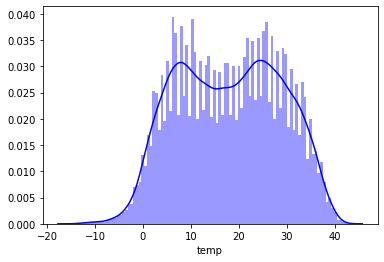

In [ ]:
#TEMP ditribution
sns.distplot(dataset['temp'], color='b', bins=100, hist_kws={'alpha': 0.4});


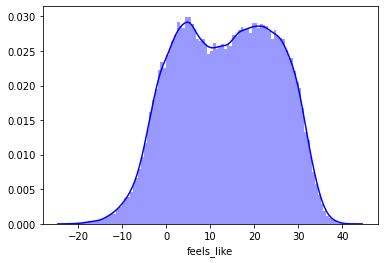

In [ ]:
#FEELS LIKE distribution
sns.distplot(dataset['feels_like'], color='b', bins=100, hist_kws={'alpha': 0.4});

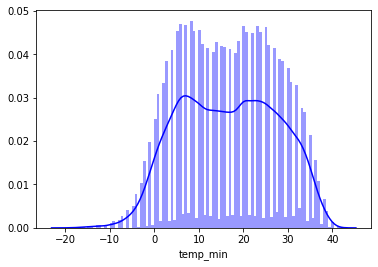

In [ ]:
#temp_min disrebution
sns.distplot(dataset['temp_min'], color='b', bins=100, hist_kws={'alpha': 0.4});

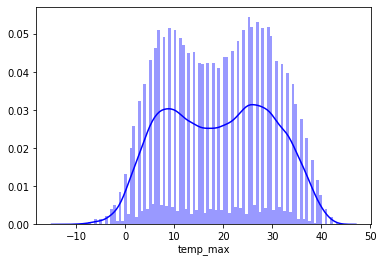

In [ ]:
#temp max distribution
sns.distplot(dataset['temp_max'], color='b', bins=100, hist_kws={'alpha': 0.4});

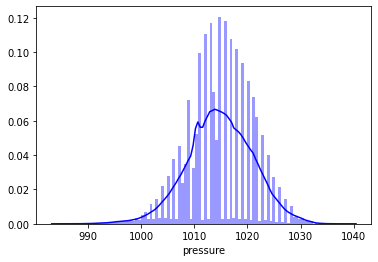

In [ ]:
#pressure distrebution
sns.distplot(dataset['pressure'], color='b', bins=100, hist_kws={'alpha': 0.4});

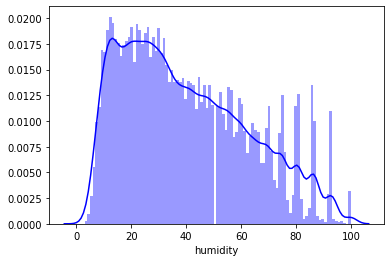

In [ ]:
#humidity distrebution
sns.distplot(dataset['humidity'], color='b', bins=100, hist_kws={'alpha': 0.4});

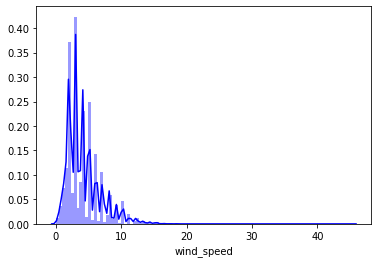

In [ ]:
#wind distrebution
sns.distplot(dataset['wind_speed'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#now we select just numerical value to plot them in one graph
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

temp  feels_like  temp_min  ...  rain_3h  clouds_all  weather_id
0  4.78        1.58      4.78  ...      NaN           0         800
1  4.80        1.51      4.80  ...      NaN           0         800
2  4.72        1.40      4.72  ...      NaN           0         800
3  3.42        0.06      3.42  ...      NaN           0         800
4  3.62        0.25      3.62  ...      NaN           0         800

[5 rows x 12 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2312e0f630>,
      dtype=object)

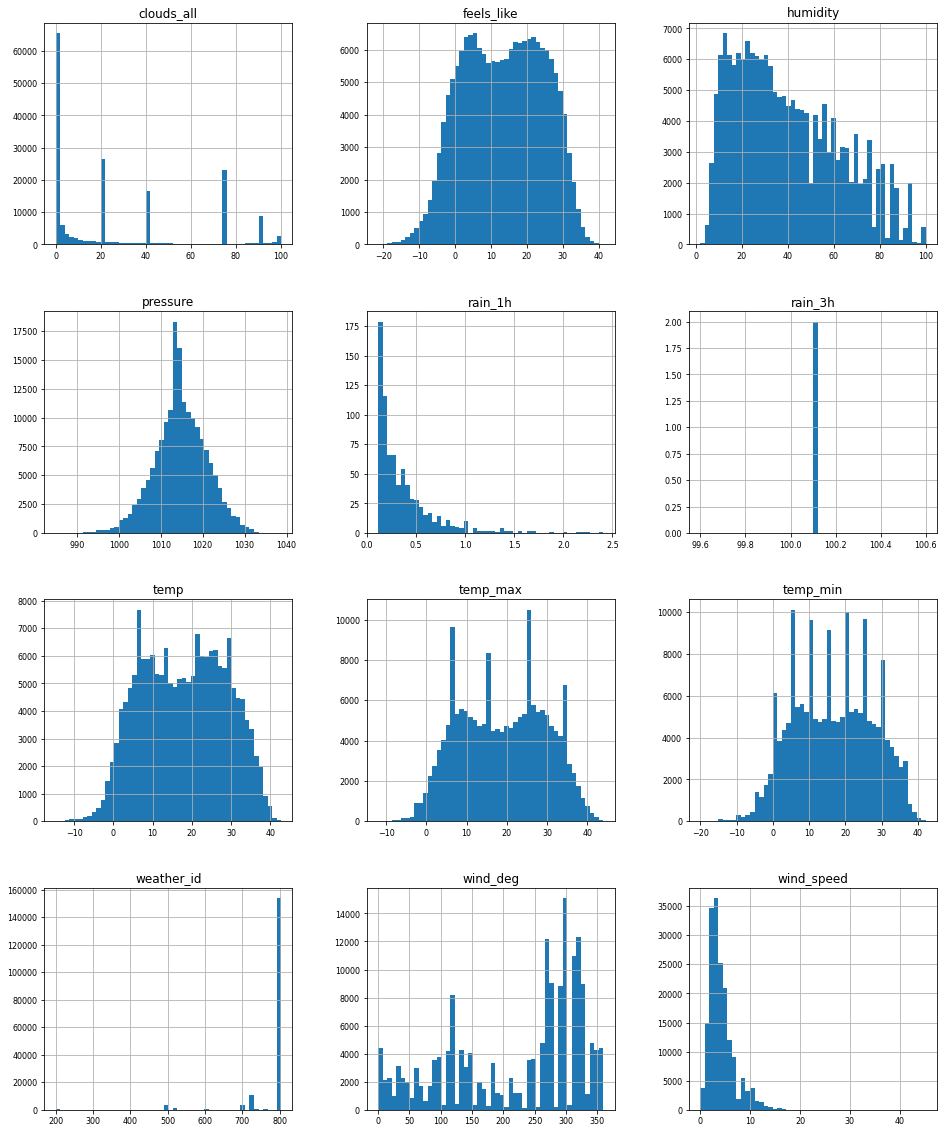

In [ ]:
#plot all distribution at one time
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#copmute the correlation between features
dataset.corr()

temp  ...  weather_description_cat
temp                     1.000000  ...                 0.092650
feels_like               0.982055  ...                 0.076555
temp_min                 0.992368  ...                 0.073893
temp_max                 0.995654  ...                 0.107716
pressure                -0.633709  ...                -0.028921
humidity                -0.751565  ...                -0.144876
wind_speed               0.088299  ...                 0.034134
wind_deg                -0.269520  ...                 0.036948
rain_1h                 -0.153742  ...                 0.748903
rain_3h                       NaN  ...                      NaN
clouds_all              -0.238803  ...                -0.518691
weather_id               0.162772  ...                 0.070441
weather_main_cat        -0.233846  ...                -0.336187
weather_description_cat  0.092650  ...                 1.000000

[14 rows x 14 columns]

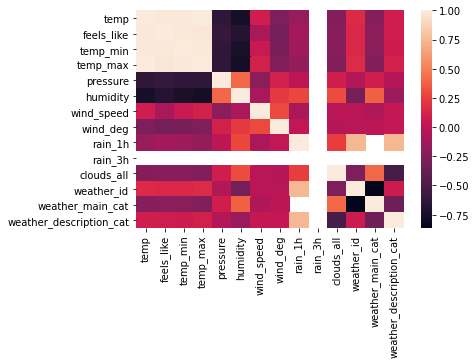

In [ ]:
#plot the correlation matrix
sns.heatmap(dataset.corr())

In [ ]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = dataset['temp']
data2 = dataset['humidity']
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.770
Samples are correlated (reject H0) p=0.000


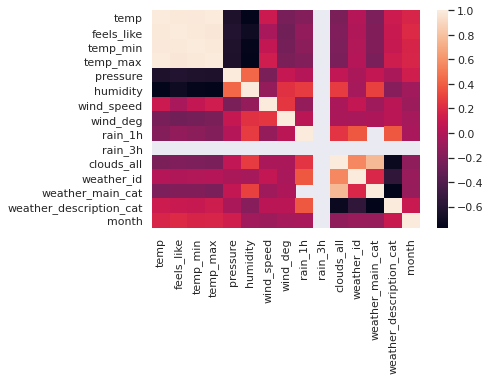

In [ ]:
corr= dataset.corr(method="spearman")
%matplotlib inline
sns.heatmap(corr)

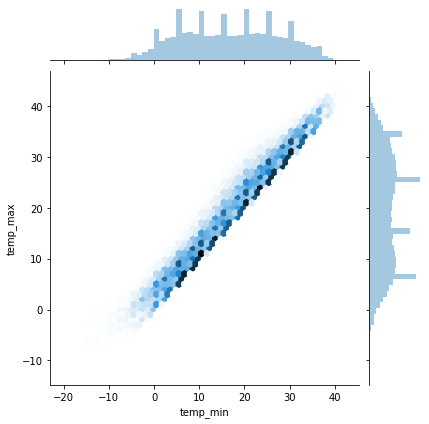

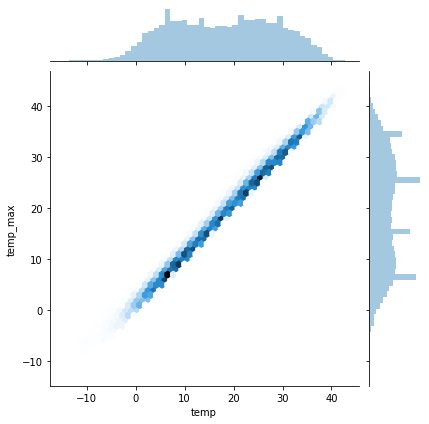

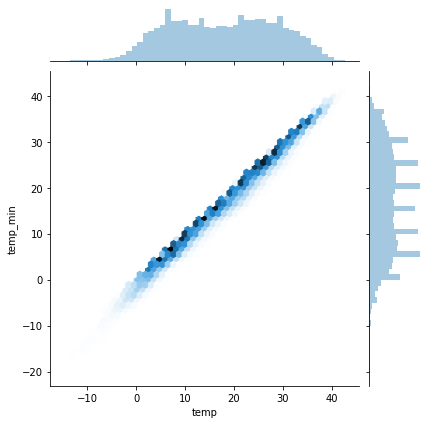

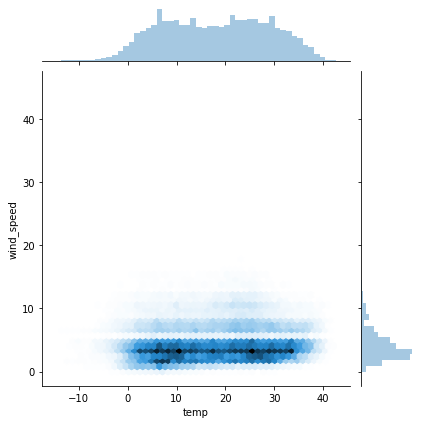

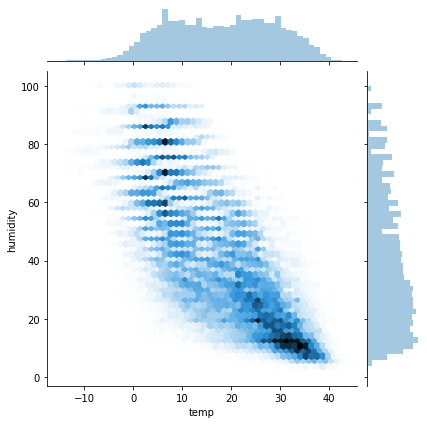

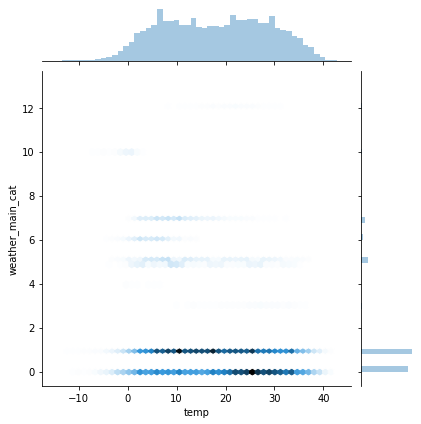

In [ ]:
#plot the joint ditribution of some features to see the nature of relation between them
sns.jointplot(x='temp_min', y='temp_max', data=dataset, kind='hex')
sns.jointplot(x='temp', y='temp_max', data=dataset, kind='hex')
sns.jointplot(x='temp', y='temp_min', data=dataset, kind='hex')
sns.jointplot(x='temp', y='wind_speed', data=dataset, kind='hex')
sns.jointplot(x='temp', y='humidity', data=dataset, kind='hex')
sns.jointplot(x='temp', y='weather_main_cat', data=dataset, kind='hex')

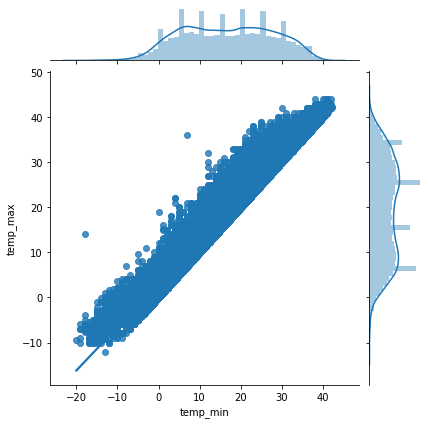

In [ ]:
sns.jointplot(x='temp_min', y='temp_max', data=dataset, kind='reg')

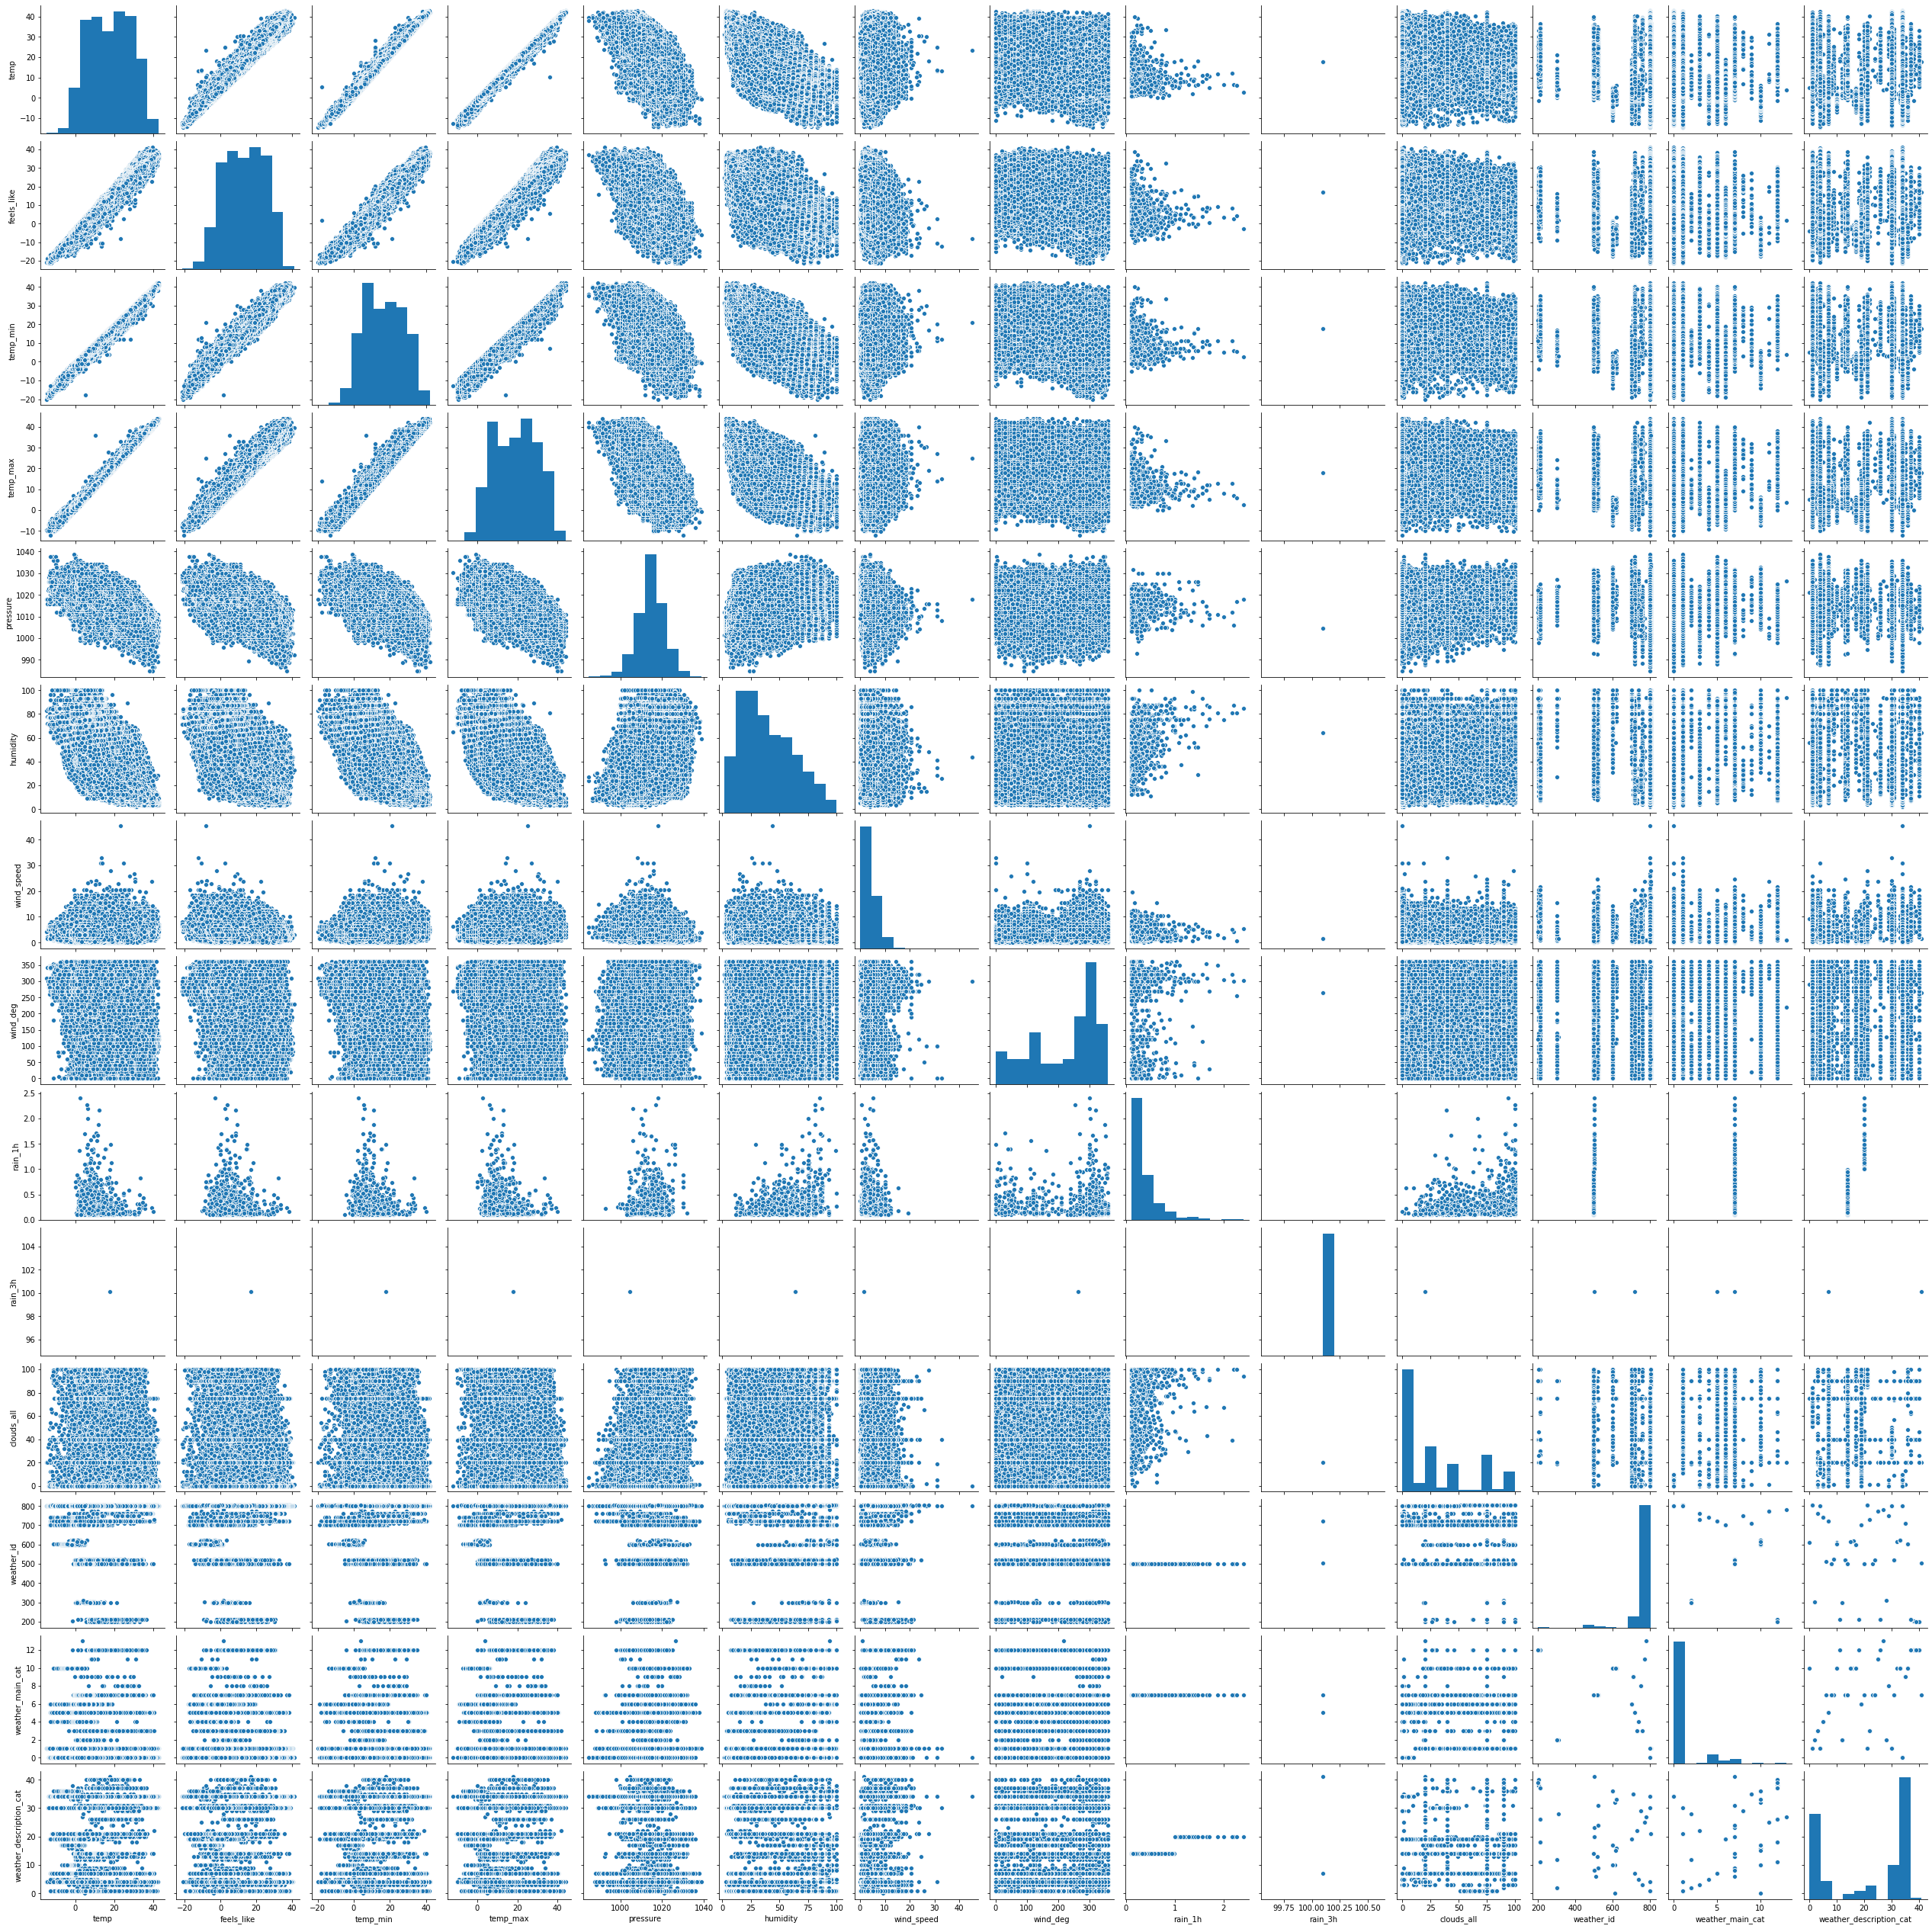

In [ ]:
#print all joint distribution using new dataset 
df = dataset
sns.pairplot(df)

In [ ]:
dataset['dt_iso'] = dataset['dt_iso'].astype('datetime64[ns]')
dataset['month'] = pd.DatetimeIndex(dataset['dt_iso']).month
dataset['date'] = pd.to_datetime(dataset['dt_iso']).dt.to_period('M')
dataset = dataset.set_index('date')
dataset.head(3)

dt_iso        city_name  ...  weather_description_cat  month
date                                          ...                                
2000-01 2000-01-01 00:00:00  Tehran Province  ...                       34      1
2000-01 2000-01-01 01:00:00  Tehran Province  ...                       34      1
2000-01 2000-01-01 02:00:00  Tehran Province  ...                       34      1

[3 rows x 17 columns]

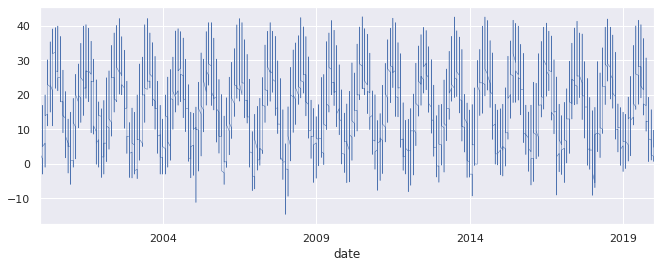

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
dataset['temp'].plot(linewidth=0.5);


In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})
cols_plot = ['temp', 'humidity', 'feels_like']
axes = dataset[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [ ]:
dataset = pd.read_csv('we.csv')

In [ ]:
dataset.shape

(175913, 25)

In [ ]:
dataset["weather_main"] = dataset["weather_main"].astype('category')
dataset.dtypes

dt                        int64
dt_iso                   object
timezone                  int64
city_name                object
lat                     float64
lon                     float64
temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                float64
sea_level               float64
grnd_level              float64
humidity                  int64
wind_speed              float64
wind_deg                  int64
rain_1h                 float64
rain_3h                 float64
snow_1h                 float64
snow_3h                 float64
clouds_all                int64
weather_id                int64
weather_main           category
weather_description      object
weather_icon             object
dtype: object

In [ ]:
dataset["weather_main_cat"] = dataset["weather_main"].cat.codes


In [ ]:
dataset["weather_description"] = dataset["weather_description"].astype('category')
dataset["weather_description_cat"] = dataset["weather_description"].cat.codes

In [ ]:
dataset.shape

(175913, 27)

In [ ]:
dataset['rain_1h'] = dataset['rain_1h'].fillna(0)
dataset['sea_level'] = dataset['sea_level'].fillna(0)
dataset['grnd_level'] = dataset['grnd_level'].fillna(0)
dataset['rain_3h'] = dataset['rain_3h'].fillna(0)
dataset['snow_1h'] = dataset['snow_1h'].fillna(0)
dataset['snow_3h'] = dataset['snow_3h'].fillna(0)

In [ ]:
dataset = dataset.drop(columns="dt")
dataset = dataset.drop(columns="timezone")
dataset = dataset.drop(columns="snow_1h")
dataset = dataset.drop(columns="weather_icon")
dataset = dataset.drop(columns="weather_main")
dataset = dataset.drop(columns="weather_description")
dataset = dataset.drop(columns="city_name")
dataset = dataset.drop(columns="weather_id")
dataset = dataset.drop(columns="clouds_all")
dataset = dataset.drop(columns="lat")
dataset = dataset.drop(columns="lon")
dataset = dataset.drop(columns="sea_level")

In [ ]:
dataset.shape

(175913, 15)

In [ ]:
dataset['dt_iso'] = dataset['dt_iso'].astype('datetime64[ns]')
dataset['date'] = pd.to_datetime(dataset['dt_iso']).dt.to_period('H')


In [ ]:
dataset = dataset.drop(columns="dt_iso")


In [ ]:
dataset = dataset.set_index('date')


In [ ]:
values = dataset.values 
values[:3]

array([[   4.78,    1.58,    4.78,    4.78, 1022.  ,    0.  ,   62.  ,
           1.36,  355.  ,    0.  ,    0.  ,    0.  ,    0.  ,   34.  ],
       [   4.8 ,    1.51,    4.8 ,    4.8 , 1022.  ,    0.  ,   61.  ,
           1.45,  355.  ,    0.  ,    0.  ,    0.  ,    0.  ,   34.  ],
       [   4.72,    1.4 ,    4.72,    4.72, 1022.  ,    0.  ,   60.  ,
           1.45,  353.  ,    0.  ,    0.  ,    0.  ,    0.  ,   34.  ]])

In [ ]:
dataset.columns.values

array(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_3h', 'weather_main_cat',
       'weather_description_cat'], dtype=object)

In [ ]:
dataset.shape

(175913, 14)

In [ ]:
def show_plot(plot_data, delta, title):
  plt.figure(figsize=(20, 10))

  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [ ]:
def series_to_supervised(data, n_in=5, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# load dataset
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 24)
# drop columns we don't want to predict
print(reframed.head())

    var1(t-24)  var2(t-24)  var3(t-24)  ...  var12(t)  var13(t)  var14(t)
24    0.339373    0.367038    0.398392  ...       0.0  0.384615  0.170732
25    0.339721    0.365923    0.398714  ...       0.0  0.384615  0.170732
26    0.338328    0.364172    0.397428  ...       0.0  0.384615  0.170732
27    0.315679    0.342834    0.376527  ...       0.0  0.384615  0.170732
28    0.319164    0.345860    0.379743  ...       0.0  0.384615  0.170732

[5 rows x 350 columns]


In [ ]:
reframed.shape

(175889, 350)

In [ ]:
reframed.drop(reframed.columns[[337,338,339,340,341,342,343,344,345,346,347,348,349]], axis=1, inplace=True)


In [ ]:
dataset.index

PeriodIndex(['2000-01-01 00:00', '2000-01-01 01:00', '2000-01-01 02:00',
             '2000-01-01 03:00', '2000-01-01 04:00', '2000-01-01 05:00',
             '2000-01-01 06:00', '2000-01-01 07:00', '2000-01-01 08:00',
             '2000-01-01 09:00',
             ...
             '2020-01-01 14:00', '2020-01-01 15:00', '2020-01-01 16:00',
             '2020-01-01 17:00', '2020-01-01 18:00', '2020-01-01 19:00',
             '2020-01-01 20:00', '2020-01-01 21:00', '2020-01-01 22:00',
             '2020-01-01 23:00'],
            dtype='period[H]', name='date', length=175913, freq='H')

In [ ]:
dataset.index.get_loc('2015-01-01 00:00')

131935

In [ ]:
values = reframed.values
n_train_hours=131935-24 # index of time "12/31/2014 23:00:00" is 52620 and lag is 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(131911, 336) (131911,) (43978, 336) (43978,)


In [ ]:
train_X_n = train_X.reshape((131911,24,14))
test_X_n = test_X.reshape((43978,24,14))

In [ ]:
# invert scaling for actual to calculate mae for test set later.
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), axis=1)
sort_v=np.array([1,0,2,3,4,5,6,7,8,9,10,11,12,13])
inv_y=inv_y[:,sort_v]
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,1]

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
 prediction_data=[]

In [ ]:
n_in = len(train_y)

In [ ]:
import time
start = time.time()
model_4 = Sequential()
# define CNN model
model_4 = Sequential()
# define CNN model
model_4.add(Conv1D(input_shape=(24,14),
                 filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu',
                 strides=1))
#model_4.add(BatchNormalization())
#model_4.add(GlobalAveragePooling1D(pool_size=2))
#model_4.add(GlobalAveragePooling1D()
model_4.add(MaxPooling1D(pool_size=2))
model_4.add(Dropout(0.25))
#model_4.add(TimeDistributed(Flatten()))
#model_4.add(Reshape((24*14,)))
model_4.add(LSTM(50,recurrent_dropout=0.2))
model_4.add(RepeatVector(24))
model_4.add(LSTM(50,recurrent_dropout=0.2,return_sequences=False))
model_4.add(Dense(1))
model_4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history_4 = model_4.fit(train_X_n, train_y, epochs=10, batch_size=200,validation_data=(test_X_n, test_y),shuffle=False)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
yhat = model_4.predict(test_X_n)
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), axis=1)
sort_v=np.array([1,0,2,3,4,5,6,7,8,9,10,11,12,13])
inv_yhat=inv_yhat[:,sort_v]
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,1]

MAE = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % MAE)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Train on 131911 samples, validate on 43978 samples
Epoch 1/10
131911/131911 [==============================] - 58s 441us/step - loss: 0.0257 - accuracy: 1.5162e-05 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 2/10
131911/131911 [==============================] - 57s 432us/step - loss: 0.0061 - accuracy: 1.5162e-05 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 3/10
131911/131911 [==============================] - 58s 437us/step - loss: 0.0051 - accuracy: 1.5162e-05 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 4/10
131911/131911 [==============================] - 58s 438us/step - loss: 0.0045 - accuracy: 1.5162e-05 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 5/10
131911/131911 [==============================] - 58s 438us/step - loss: 0.0040 - accuracy: 1.5162e-05 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/10
131911/131911 [==============================] - 58s 441us/step - loss: 0.0037 - accuracy: 1.5162e-05 - val_loss: 0.0027 - val_accuracy: 0.0000

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(inv_y, inv_yhat), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(inv_y, inv_yhat), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(inv_y, inv_yhat), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(inv_y, inv_yhat), 2)) 
print("R2 score =", round(sm.r2_score(inv_y, inv_yhat), 2))

Mean absolute error = 1.77
Mean squared error = 5.12
Median absolute error = 1.45
Explain variance score = 0.97
R2 score = 0.96


In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 24, 64)            2752      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                23000     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 24, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

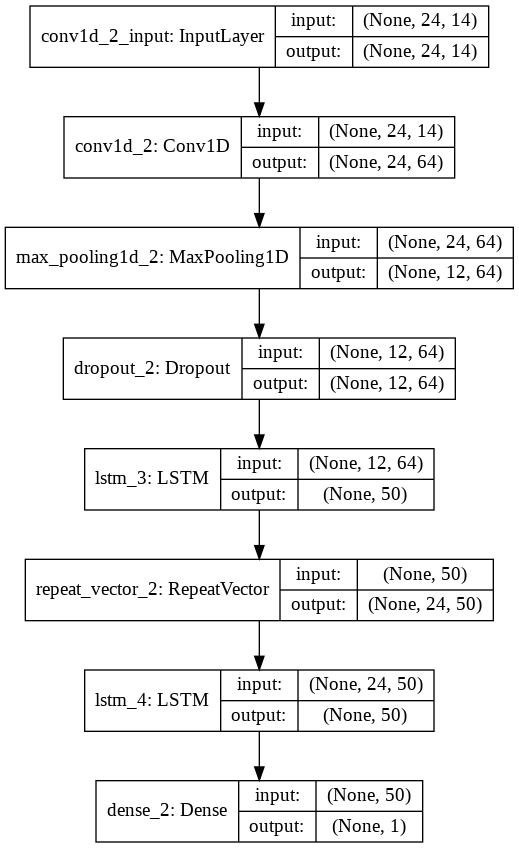

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model_4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

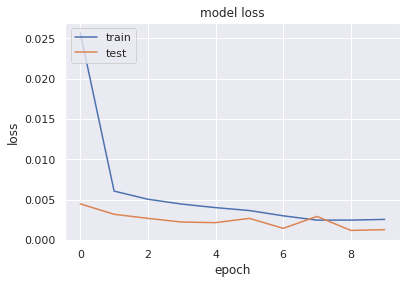

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

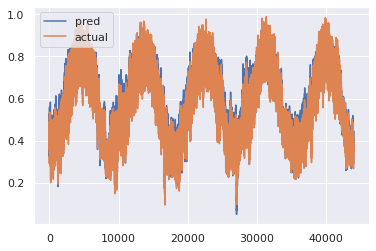

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
preds = yhat
actuals = test_y
pyplot.plot(preds)
pyplot.plot(actuals)
plt.legend(['pred', 'actual'], loc='upper left')
pyplot.show()

In [ ]:
plt.figure(figsize=[20,10])
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(test_y)), "bo", markersize=5, label="Actual")
plt.plot(pd.Series(np.ravel(yhat)), "r.", markersize=5, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.tight_layout()
plt.subplots_adjust(left=0.07)

plt.show()

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  plt.figure(figsize=[20,10])

  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

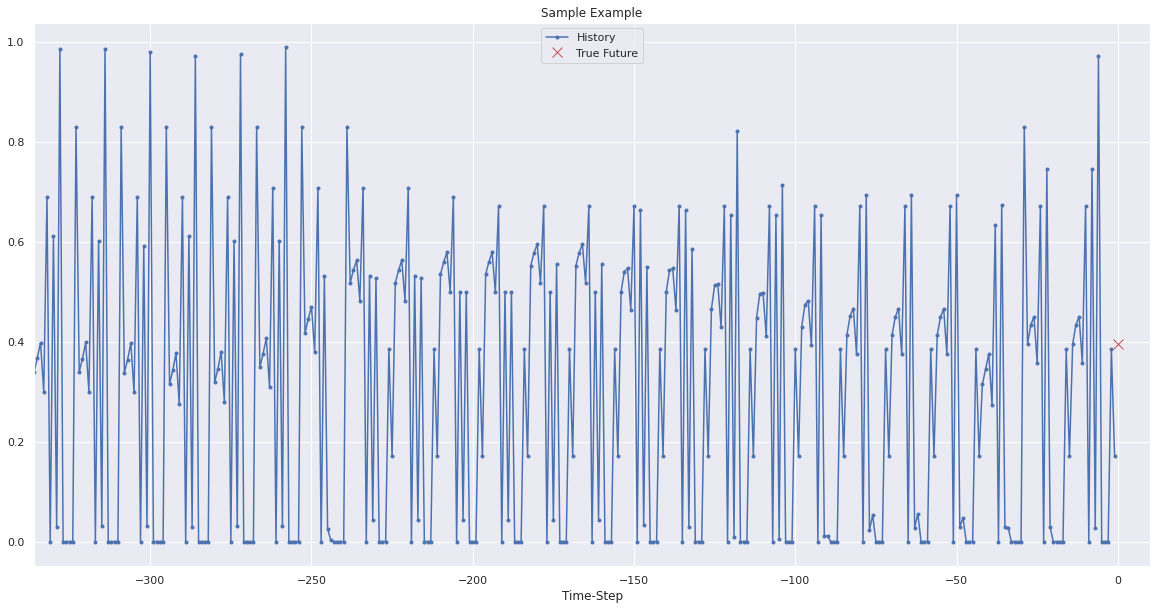

In [ ]:
show_plot([train_X[0], train_y[0]], 0, 'Sample Example')


In [ ]:
def baseline(history_4):
  return np.mean(history_4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

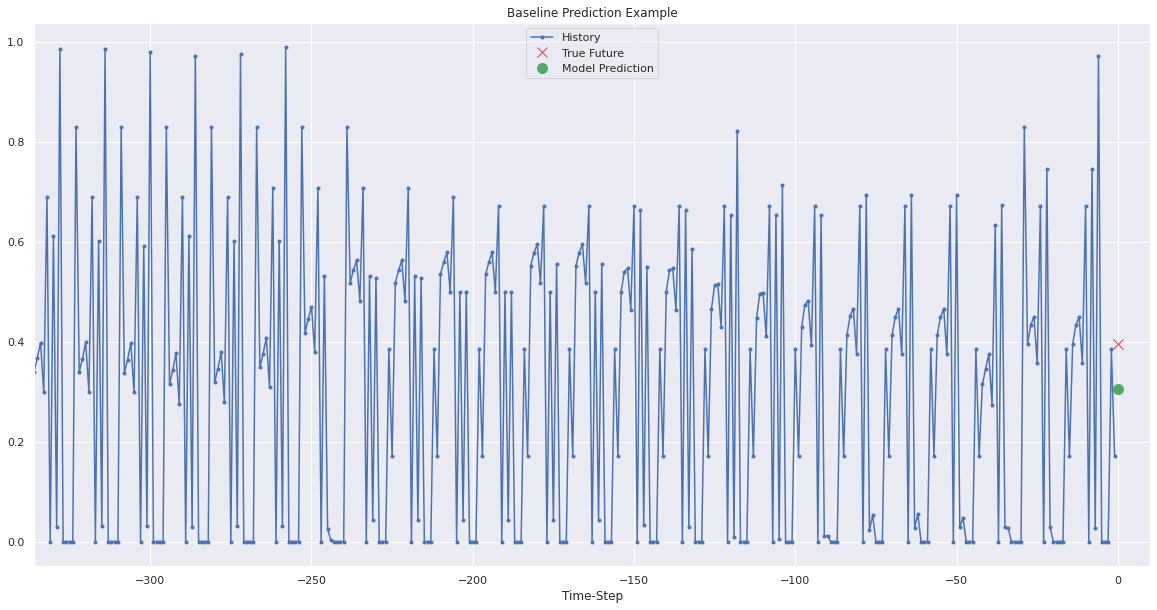

In [ ]:
show_plot([train_X[0], train_y[0], baseline(train_X[0])], 0,
           'Baseline Prediction Example')

In [ ]:
trainPredict = model_4.predict(train_X_n)
testPredict = model_4.predict(test_X_n)

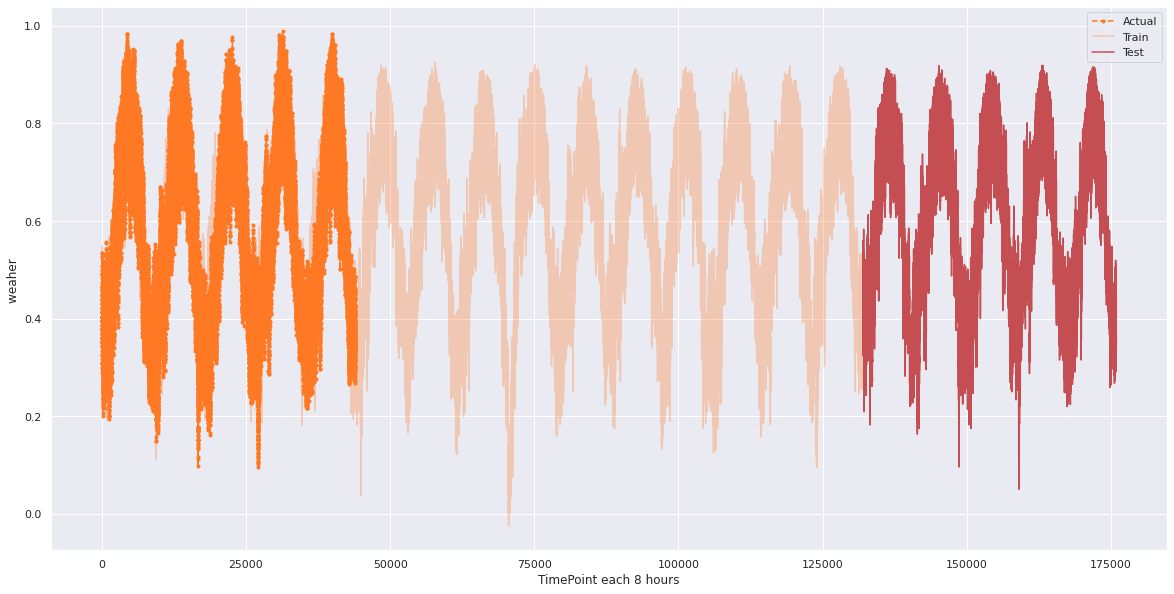

In [ ]:
look_back=24
plt.figure(figsize=[20,10])
plt.xlabel('TimePoint each 8 hours')
plt.ylabel('weaher ')
plt.plot(range(len(test_y)),test_y,'k.', label="actual",color='#ff7823', linestyle='--')
plt.plot(range(look_back,len(trainPredict)+look_back),trainPredict,'b',color='#ff7823', alpha=0.3)
plt.plot(range(len(trainPredict)+2*look_back,len(trainPredict)+len(testPredict)+2*look_back),testPredict,'r')
plt.legend(['Actual','Train','Test']);

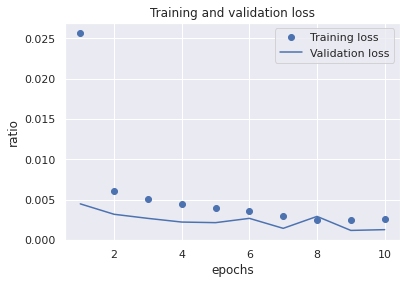

In [ ]:
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('ratio')
plt.legend()
plt.show();

In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = trainPredict
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()